In [1]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()
df.shape
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [2]:
df.info()
df.describe()
df['Attrition'].value_counts()
df['JobRole'].value_counts()
df['OverTime'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0

In [6]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome']  # example
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [13]:
df['Attrition'].value_counts(normalize=True)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


<Axes: >

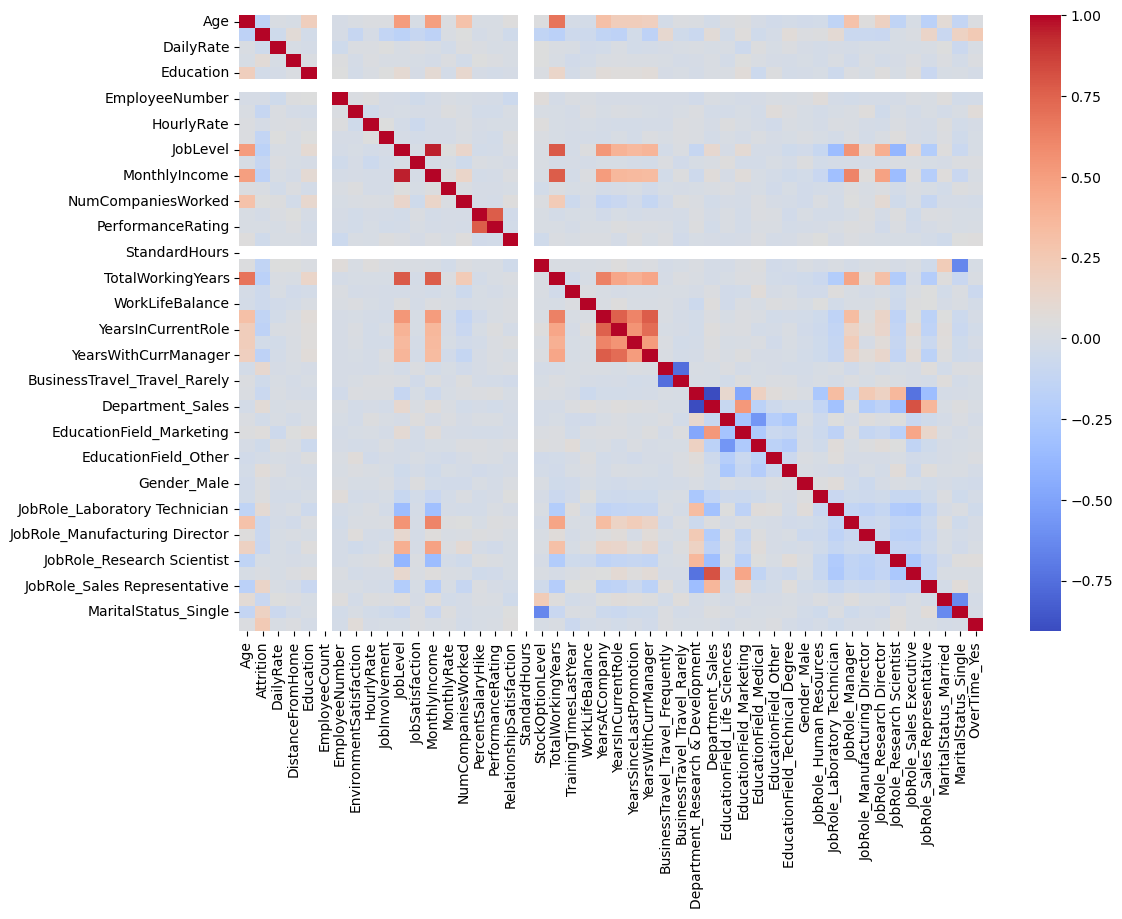

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')

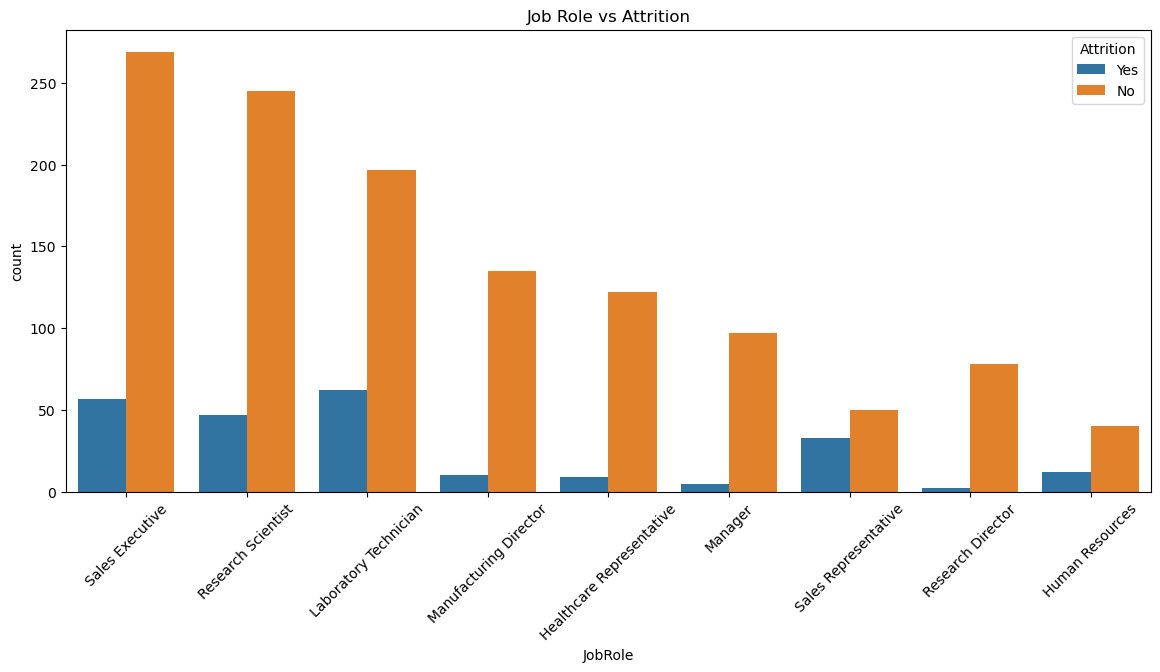

In [16]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df_original = df.copy()
plt.figure(figsize=(14,6))
sns.countplot(x='JobRole', hue='Attrition', data=df_original)
plt.xticks(rotation=45)
plt.title("Job Role vs Attrition")
plt.show()

In [7]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# 2. Load dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')  # update path if needed

# 3. Drop non-numeric/categorical unnecessary columns (optional)
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

# 4. Encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# 5. Split features and target
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

# 6. Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 7. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# 8. Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 9. Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🔍 {name} Evaluation Results:")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔍 Logistic Regression Evaluation Results:
Accuracy : 0.6761
Precision: 0.6707
Recall   : 0.6762
F1 Score : 0.6735

🔍 Random Forest Evaluation Results:
Accuracy : 0.9271
Precision: 0.9483
Recall   : 0.9016
F1 Score : 0.9244


C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:06:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost Evaluation Results:
Accuracy : 0.9352
Precision: 0.9530
Recall   : 0.9139
F1 Score : 0.9331


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"---{name}---")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---Logistic Regression---
[[169  81]
 [ 79 165]]
              precision    recall  f1-score   support

       False       0.68      0.68      0.68       250
        True       0.67      0.68      0.67       244

    accuracy                           0.68       494
   macro avg       0.68      0.68      0.68       494
weighted avg       0.68      0.68      0.68       494

---Random Forest---
[[238  12]
 [ 24 220]]
              precision    recall  f1-score   support

       False       0.91      0.95      0.93       250
        True       0.95      0.90      0.92       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:07:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


---XGBoost---
[[239  11]
 [ 21 223]]
              precision    recall  f1-score   support

       False       0.92      0.96      0.94       250
        True       0.95      0.91      0.93       244

    accuracy                           0.94       494
   macro avg       0.94      0.93      0.94       494
weighted avg       0.94      0.94      0.94       494



<Axes: >

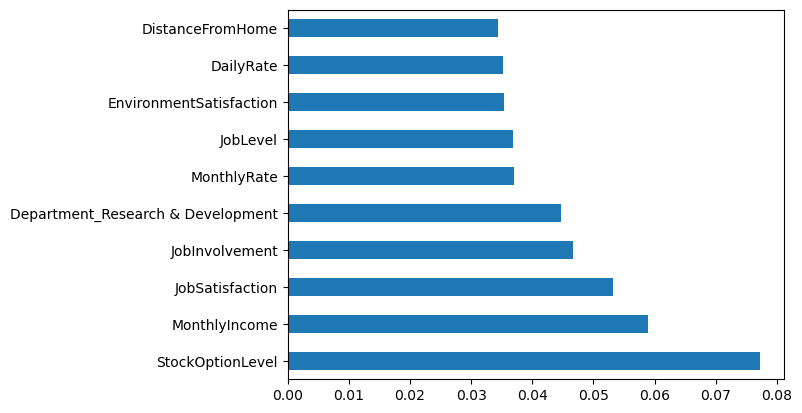

In [9]:
importances = models["Random Forest"].feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feature_importance.head(10).plot(kind='barh')